<a href="https://colab.research.google.com/github/crazygovind/AI-Foundation-Whitehat-Jr/blob/master/52_Project_SLR_RESIDUAL_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Instructions

---

#### Goal of the Project

This project is designed for you to practice and solve the activities that are based on the concepts covered in the following lessons:

 1. Simple Linear Regression - Model Evaluation
 
 2. Simple Linear Regression - Residual Analysis
 

---

### Problem Statement

While working in a job environment, the monetary gained value is 'Salary' which is different for every person based on various parameters. 

Build a model that is capable of predicting the salary of a person based on his/her **years of experience** using simple linear regression. Also, evaluate the accuracy of your model by performing residual analysis.






---

### List of Activities

**Activity 1:** Analysing the Dataset

  
**Activity 2:**  Train-Test Split

**Activity 3:**  Model Training

**Activity 4:** Model Prediction 

**Activity 5:** Residual Analysis








---


#### Activity 1:  Analysing the Dataset

- Create a Pandas DataFrame for **Salary** dataset using the below link. This dataset consists of following columns:

|Field|Description|
|---:|:---|
|YearsExperience|Years of experience of a person|
|Salary|Salary of a person|

  **Source:** https://www.kaggle.com/karthickveerakumar/salary-data-simple-linear-regression

  **Dataset Link:** https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/salary.csv
  
- Print the first five rows of the dataset. Check for null values and treat them accordingly.

- Create a regression plot with `YearsExperience` on X-axis and `Salary` on Y-axis to identify the relationship between these two attributes.




In [16]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
df=pd.read_csv('https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/salary.csv')
# Print first five rows using head() function
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [2]:
# Check if there are any null values. If any column has null values, treat them accordingly
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

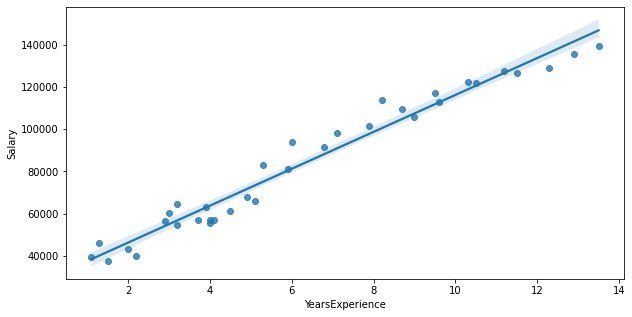

In [4]:
# Create a regression plot between 'YearsExperience' and 'Salary'
import seaborn as sns
plt.figure(figsize=(10,5))
sns.regplot(x='YearsExperience',y='Salary',data=df)

---

#### Activity 2: Train-Test Split

We have to determine the effect of `YearsExperience` on income. Thus, `YearExperience` is the feature variable and `Salary` is the target variable. 

Split the dataset into training set and test set such that the training set contains 80% of the instances and the remaining instances will become the test set.

In [6]:
# Split the DataFrame into the training and test sets.
from sklearn.model_selection import train_test_split
X=df['YearsExperience']
y=df['Salary']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

---

#### Activity 3: Model Training

Implement simple linear regression using `sklearn` module in the following way:

1. Reshape the feature and the target variable arrays into two-dimensional arrays by using `reshape(-1, 1)` function of numpy module.
2. Deploy the model by importing the `LinearRegression` class and create an object of this class.
3. Call the `fit()` function on the LinearRegression object and print the slope and intercept values of the best fit line.


In [9]:
# 1. Create two-dimensional NumPy arrays for the feature and target variables. 
# Print the shape or dimensions of these reshaped arrays
type(X_train.values)
X_train_reshaped=X_train.values.reshape(-1,1)
X_test_reshaped=X_test.values.reshape(-1,1)
y_train_reshaped=y_train.values.reshape(-1,1)
y_test_reshaped=y_test.values.reshape(-1,1)

print(X_train_reshaped.shape)
print(X_test_reshaped.shape)
print(y_train_reshaped.shape)
print(y_test_reshaped.shape)

(23, 1)
(12, 1)
(23, 1)
(12, 1)


In [10]:
# 2. Deploy linear regression model using the 'sklearn.linear_model' module.
from sklearn.linear_model import LinearRegression
# Create an object of the 'LinearRegression' class.
lr=LinearRegression()


# 3. Call the 'fit()' function
lr.fit(X_train_reshaped,y_train_reshaped)

# Print the slope and intercept values
print(lr.coef_,lr.intercept_)

[[8641.54265167]] [29259.79703691]


---

#### Activity 4: Model Prediction 

Predict the values for the training and test set by calling the `predict()` function on the LinearRegression object.

Suppose you got a candidate having 15 years of experience. Calculate the best salary you should offer to him according to this prediction model.

**Note:** We know that `sklearn.linear_model` module accepts two-dimensional arrays. To predict the salary of a person with 15 years of experience, convert `15` into 2D array and then pass it to the `predict()` function as follows:

`predict([[15]])`

In [13]:
# Predict the target variable values for the training and test set
y_train_pred=lr.predict(X_train_reshaped)
y_test_pred=lr.predict(X_test_reshaped)
print(y_train_pred.shape)
print(y_test_pred.shape)

(23, 1)
(12, 1)


In [17]:
# Predict salary of a person having 15 years of experience
a=lr.predict([[15]])
a

array([[158882.936812]])

**Q:** What is the best salary you can offer to the candidate having 15 years of experience?

**A:** 

---

#### Activity 5: Residual Analysis

Check if the error terms are normally distributed using the histogram between errors (calculated by the difference of actual and predicted values) for both training and testing data.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


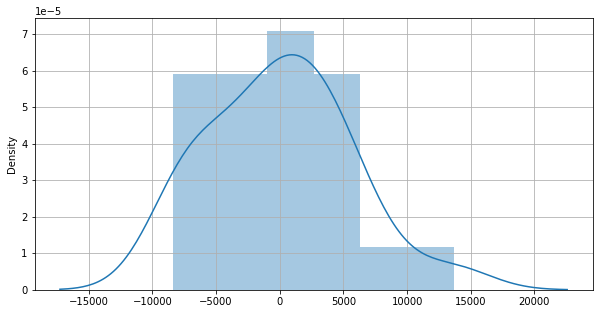


 1.1704801379338555e-11


In [44]:
# Create a histogram for the errors obtained in the predicted values for the train set.
plt.figure(figsize=(10,5))
data=(y_train_reshaped-y_train_pred)
sns.distplot(data,bins='sturges')
plt.grid()
plt.show()

**Q:** What is the mean of errors for the training set?

**A:** 



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


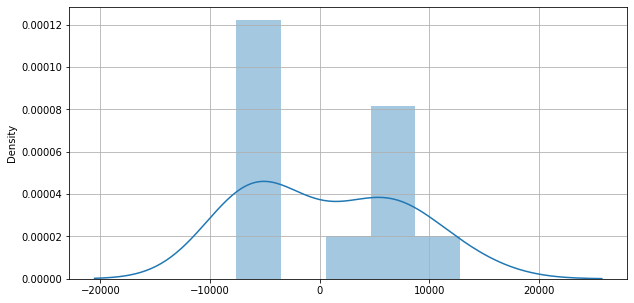

In [48]:
# Create a histogram for the errors obtained in the predicted values for the test set.
plt.figure(figsize=(10,5))
data1=(y_test_reshaped-y_test_pred)
sns.distplot(data1,bins='sturges')
plt.grid()
plt.show()


**Q:** What is the mean of errors?Is it zero?

**A:** 


---